<a href="https://colab.research.google.com/github/christopherormerod/AI-AES-Colab/blob/main/AI_Scoring_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
!pip install datasets
!pip install transformers
!pip install torch
!pip install sentence_transformers
!pip install huggingface_hub
!pip install groq
!pip install cerebras
!pip install wandb
!pip install optuna
import pandas as pd
import numpy as np
import scipy as sp
import math
import sklearn
import transformers
import torch
import datasets
import torch
import sentence_transformers
import wandb
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 4.3 MB/s eta 0:00:00


Click [here](#turn_on_gpu) to get to the GPU enabled sections.

# Introduction to AI Scoring in Python

### Course Outline

This hands-on workshop introduces participants to automated scoring using Python and machine learning techniques. Course materials include a code repository accessible through Google Colab notebooks.

By completing this workshop, participants will be able to:

**Master Core Concepts:** Grasp essential machine learning principles, particularly text classification methods and language models used in automated scoring applications.

**Develop Technical Skills:** Install and effectively use Python libraries essential for machine learning implementation.

**Navigate the complete machine learning workflow:** loading data, saving models, training algorithms, and calling text classifiers

**Apply Standard AES methods:** Implement a range of text classification approaches, from traditional frequency-based methods (such as TF-IDF and n-grams) to modern fine-tuned language models.

**Apply Advanced AES methods:** Implement Bayesian hyperparameter tuning, regression based modeling, and applications of generative models.

1. [Introduction to Python](#introduction)

    - [Variables](#variables)

    - [Data Types](#data_types)

    - [Control Structures](#control_structures)

    - [Functions](#functions)

    - [Libraries](#libraries)

2. [Machine Learning](#machine_learning)

    - [Datasets](#datasets)

    - [Logistic Regression](#log_reg)

    - [Random Forest](#rand_forest)

    - [Naive Bayes](#naive_bayes)

3. [Automated Essay Scoring](#automated_essay_scoring)

    - [Using Words as Features](#bow)

    - [Singular Value Decomposition](#SVD)

    - [Hand-crafted Features](#features)

    - [Document Embeddings](#embeddings)

    - [Fine-tuned Large Language Models](#llms)

4. [Advanced Techniques](#advanced)

    - [Hyperparameter Tuning](#hyperparameter)

    - [Regression-based scoring](#Regression)

    - [Generative Models](#generative)

    - [Scoring Using Generative Models](#generative_scoring)

## Introduction to Python <a name="introduction"></a>

Python was conceived in the late 1980s by Guido van Rossum at Centrum Wiskunde & Informatica (CWI) in the Netherlands as a successor to the ABC language. Van Rossum's goal was to create a language that emphasized code readability and a simple, clean syntax, famously using indentation rather than braces to define code blocks. He named the project after the British comedy troupe Monty Python. The first public release, version 0.9.0, appeared in February 1991, introducing key features like exception handling, functions, and the core data types of list, dict, str, and others. It is now the most popular language for machine learning.

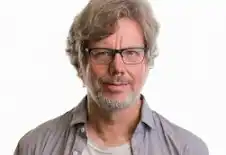

There are several basics to learn:

**Variables:** How to store information (like numbers, text, or true/false values) in named containers.

**Data Types:** Understanding the different kinds of information you can store, such as integers, floating-point numbers, strings (text), and booleans.

**Operators:** The symbols that perform actions, like + for addition, == for comparison, and && (or and) for logical operations.

**Control Flow:** This is how you direct the "flow" of your program.

**Conditionals (if/else statements):** Making decisions and running code only if a certain condition is true.

**Loops (for/while loops):** Repeating a block of code multiple times.

**Functions (or Methods):** Bundling lines of code into a reusable block that you can "call" by name to perform a specific task.

**Data Structures:** Simple ways to group data together, most commonly with Arrays/Lists (an ordered collection) and Hashmaps/Dictionaries (a collection of key-value pairs).

# Variables, Types, and Control Structures <a name="variables"></a>

In all programming, variables, data types, and control structures are the fundamental building blocks you'll use to write any script or application. Together, they allow you to store information, understand what kind of information you have, and make decisions based on it.

## Variables: The Data Containers

Think of a variable as a labeled box 📦 where you can store a piece of information. It has two main parts: a name (the label on the box) and a value (the contents inside). You can change the value, which is why it's called a "variable."

In [ ]:
# 'name' is the variable, "Alice" is the value.
name = "Alice"

# 'age' is the variable, 30 is the value.
age = 30

# The value can be updated.
age = 31

## Data Types: The Kind of Information <a name="data_types"></a>

A data type defines what kind of value a variable can hold. This is important because the type determines what operations you can perform on it (e.g., you can do math on numbers, but not on text). Python automatically detects the data type for you.

Here are the most common basic types:

In [ ]:
# String
name  = "Alice"
# Integer
age = 30
# Float
height = 1.99

If you are unsure, you can always ask for the type of a variable using the type function. You can also determine what functions and variables the variable contains by using dir.

In [ ]:
print(type("string"))
print(type(1))
dir(1)

## Control Structures: The Flow of Logic <a name="control_structures"></a>

Control structures are like a recipe's instructions 📜 or a GPS giving directions; they direct the flow and order of your code's execution. They let your program make decisions and repeat actions.

The two main types are:

1. Conditionals (if/elif/else)
Conditionals let your code make choices. They execute a block of code if a certain condition is true.

2 Loops (for/while)
Loops are used to repeat a block of code multiple times.
A for loop repeats an action for each item in a sequence (like a list).

A while loop repeats an action as long as a certain condition remains true.

2. Loops (for/while)
Loops are used to repeat a block of code multiple times.

A for loop repeats an action for each item in a sequence (like a list).

A while loop repeats an action as long as a certain condition remains true.



In [ ]:
for x in range(10):
  if x % 3 == 0:
    print(x)
  else:
    print("Not a multiple of 3")

0
Not a multiple of 3
Not a multiple of 3
3
Not a multiple of 3
Not a multiple of 3
6
Not a multiple of 3
Not a multiple of 3
9


# Functions, classes, and class functions <a name="functions"></a>

Functions, classes, and methods are core concepts in programming that help you organize code into logical, reusable, and efficient blocks. They allow you to move from writing simple scripts to building complex applications

## Functions: The Reusable Tools

A function is a named, reusable block of code that performs a specific task. Think of it like a recipe 📜 or a coffee grinder ☕; you give it some inputs (arguments), it performs a series of steps, and it can give you an output (a return value).

Functions help you follow the DRY (Don't Repeat Yourself) principle. Instead of writing the same code multiple times, you write it once inside a function and then "call" that function whenever you need it.

In [ ]:
# Defining a simple function
def add_numbers(a, b):
  result = a + b
  return result

# Calling the function and using its output
sum1 = add_numbers(5, 10) # sum1 is now 15
sum2 = add_numbers(100, 50) # sum2 is now 150

## Installing Libraries with pip <a name="libraries"></a>

You'll almost always use a command-line tool called pip, which is Python's standard package manager. It downloads and installs libraries from a central repository called the Python Package Index (PyPI).


To install a library in colab, use the !pip command, which executes pip from the command line. We loaded the libraries at the beginning of the notebook.

## Standard libraries

Python comes with a "battery-included" philosophy, meaning it has a rich Standard Library of modules that are pre-installed with every distribution. You can use these powerful tools just by importing them, no pip install needed.

**Pandas**: A library for handling panel data.

**NumPy**: A Library for numerical data manipulation.

**SciPy**: A library for Machine Learning

**Sci-kit-learn**: A library for traditional machine learning algorithms.

Given any library that has been installed (preinstalled or installed using pip), the command for importing the library is

import library

or, if we wish to give the library some alias, we can use the command

import library as alias

For example, at the beginning of a python program, you might see a collection of imports, like so:

Once these libraries are imported, we can access any of the functions or variables.  

In [ ]:
print(math.cos(math.pi))

-1.0


## Classes: The Blueprints for Objects

A class is a blueprint 📐 for creating objects. An object is a collection of related data and behaviors. The class defines what attributes (data) and methods (behaviors) all objects of that type will have.

For example, a Car class could define that all car objects must have attributes like color and model, and methods like start_engine() and drive().

In [ ]:
# Defining a Car class (the blueprint)
class Car:
  # The __init__ method is a special method that runs when an object is created
  def __init__(self, color, model):
    self.color = color # Attribute
    self.model = model # Attribute
    self.is_running = False # Attribute

# Creating objects (instances) from the class
my_car = Car("Red", "Tesla Model S")
your_car = Car("Blue", "Ford Mustang")

## Methods: Functions Inside a Class

A method is simply a function that is defined inside a class. ⚙️ It defines a behavior or action that an object created from that class can perform.

The main difference between a function and a method is that a method is "aware" of the specific object it was called on. It can access and modify that object's attributes (its internal data). This is done through the special first parameter, conventionally named self, which automatically refers to the object instance itself.

In [ ]:
class Car:
  def __init__(self, color, model):
    self.color = color
    self.model = model
    self.is_running = False

  # This is a method
  def start_engine(self):
    print(f"The {self.model}'s engine is starting...")
    self.is_running = True # Modifies the object's attribute

  # This is another method
  def stop_engine(self):
    print("The engine is stopping.")
    self.is_running = False

# Create an object
my_car = Car("Red", "Tesla Model S")

# Call the method on the specific object instance
my_car.start_engine() # Output: The Tesla Model S's engine is starting...
print(f"Is the engine running? {my_car.is_running}") # Output: Is the engine running? True

The Tesla Model S's engine is starting...
Is the engine running? True


# Traditional Machine Learning Classifers <a name="machine_learning"></a>

Traditional machine learning classifiers are algorithms that learn to sort data into predefined categories. 🧠 Think of it like a machine learning to sort mail into different bins (e.g., "Bills," "Junk Mail," "Personal Letters"). It learns from examples you've already sorted.

## How They Work
The process involves two main phases:

### Training

The classifier is "trained" on a dataset where the correct categories, or labels, are already known. The algorithm analyzes the input features (e.g., for an email, features could be the sender, subject line, and specific words in the body) and learns the patterns associated with each label (e.g., "Spam" or "Not Spam").

### Prediction

Once trained, the classifier can take new, unlabeled data and predict which category it belongs to based on the patterns it learned.

This method is a core part of supervised learning, as it requires human-labeled data to supervise the learning process.

### Common Examples
Some of the most well-known traditional classifiers include:

Logistic Regression: Used for binary classification (two categories), it predicts the probability of an input belonging to a specific class.

Random Forest: Creates a tree-like model of decisions. Each branch represents a feature, and each leaf node represents a class label. Creating many such trees creates a "Forest".

Naive Bayes: A probabilistic classifier based on Bayes' theorem that works well for tasks like text classification.

These methods are often contrasted with modern deep learning models, which can automatically learn features from raw data (like images or text) without needing them to be manually defined first.

## A Synthetic Dataset to get us started.

We start with a dataset of apples and oranges with two features; size and sweetness. In this dataset the size and sweetness are normally distributed with different means and standard deviations.

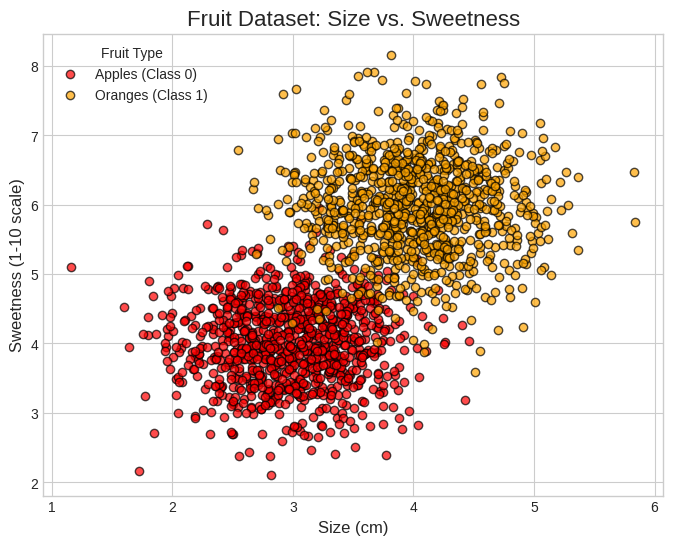

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

n_apples = 1000
n_oranges = 1000
apples_size = np.random.normal(3, 0.5, n_apples)
apples_sweetness = np.random.normal(4, 0.6, n_apples)

# Oranges (Class 1): Generally larger and sweeter
oranges_size = np.random.normal(4, 0.5, n_oranges)
oranges_sweetness = np.random.normal(6, 0.7, n_oranges)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(apples_size, apples_sweetness, c='red', label='Apples (Class 0)', alpha=0.7, edgecolors='k')
ax.scatter(oranges_size, oranges_sweetness, c='orange', label='Oranges (Class 1)', alpha=0.7, edgecolors='k')
ax.set_title('Fruit Dataset: Size vs. Sweetness', fontsize=16)
ax.set_xlabel('Size (cm)', fontsize=12)
ax.set_ylabel('Sweetness (1-10 scale)', fontsize=12)
ax.legend(title='Fruit Type')
ax.grid(True)

## Data Management : Train, Test, and Dev <a name="datasets"></a>

In machine learning, splitting your data into training, development (or validation), and test sets is a crucial practice for building robust and reliable models. Each set serves a distinct and vital purpose throughout the model development lifecycle.

### Training Set: The Learning Ground 🧠

The **training set** is the largest portion of your data and is used to teach the machine learning model. Think of it as the textbook and practice problems you give to a student. The model observes this data, learns the underlying patterns and relationships between the input features and the output, and adjusts its internal parameters accordingly.

The primary need for a training set is to **fit the model**. Without it, the model would have no information to learn from and would be unable to make any predictions.

***
### Development (Validation) Set: The Practice Exam 📝

The **development set**, often called the **validation set**, is a separate portion of the data that the model hasn't seen during training. This set acts like a practice exam for the student. Its main purpose is to provide an unbiased evaluation of the model's performance during the development phase and to help in **hyperparameter tuning**.

Here's why you need a development set:

* **Model Selection:** You'll often train several different models (e.g., with different architectures or algorithms). The development set helps you compare their performance and choose the best one.
* **Hyperparameter Tuning:** Machine learning models have various settings called hyperparameters (e.g., learning rate, number of layers in a neural network) that are not learned from the training data. You use the development set to experiment with different hyperparameter values and find the combination that yields the best performance.
* **Preventing Overfitting:** Overfitting occurs when a model learns the training data too well, including its noise and idiosyncrasies, and as a result, performs poorly on new, unseen data. By evaluating the model on the development set, you can get a more realistic estimate of its ability to generalize. If the model performs exceptionally well on the training set but poorly on the development set, it's a clear sign of overfitting.

***
### Test Set: The Final Exam 🏆

The **test set** is a final, completely unseen portion of the data that is used only once, after all the training and tuning is complete. This is the equivalent of a final exam. Its sole purpose is to provide an **unbiased evaluation of the final, tuned model's performance**.

The necessity of a test set lies in its ability to give you a true measure of how your model will perform in the real world on brand-new data. Because you used the development set to make decisions about the model (choosing the best architecture and hyperparameters), the model has been indirectly influenced by that data. Therefore, the performance on the development set might be slightly optimistic. The test set provides a final, objective assessment of the model's generalization capabilities.

We arrange this in terms $X$, which contains features and $y$ which is our labels. 0 for apples and 1 for oranges.

In [ ]:
X = np.vstack((
    np.column_stack((apples_size, apples_sweetness)),
    np.column_stack((oranges_size, oranges_sweetness))
))
y = np.hstack(([0] * n_apples, [1] * n_oranges))

We also want to split this up into a training set and a test set.

In [ ]:
X_pretrain, X_test, y_pretrain, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = sklearn.model_selection.train_test_split(X_pretrain, y_pretrain, test_size=0.15, random_state=42)

NameError: name 'sklearn' is not defined

Our goal is to distiguish apples and oranges based on the features.

## Logistic Regression: The Linear Approach <a name="log_reg"></a>

Logistic Regression is a simple yet powerful classifier that works by finding a straight line (or a flat plane in higher dimensions) that best separates the different classes. It learns the optimal position and angle for this line from the training data.

Once this line, known as the decision boundary, is established, the classifier can decide the class of a new, unseen fruit. If the new fruit's data point falls on one side of the line, it's classified as an Apple; if it falls on the other, it's an Orange. It's best suited for problems where the data is mostly linearly separable.

In [ ]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       199
           1       0.98      0.96      0.97       201

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## Random Forest: The Flexible Approach <a href="rand_forest"></a>

A Random Forest is a more complex and flexible model. It works by building a multitude of individual decision trees and then combining their outputs. Each tree asks a series of simple questions about the features (e.g., "Is the size > 4.5cm?").

By combining hundreds of these simple trees, a Random Forest can create a highly complex, non-linear decision boundary that can curve and adapt to the data's structure. This makes it very powerful for problems where a simple straight line isn't enough to separate the classes effectively. It essentially takes a "wisdom of the crowd" approach to classification.

In [ ]:
clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       199
           1       0.97      0.95      0.96       201

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## Naive Bayes: A simple probabilistic classifier <a name="naive_bayes"></a>

A simple yet powerful probabilistic classifier based on Bayes' Theorem. Its core principle is to calculate the probability that a given data point belongs to a particular class based on its features. The "naive" part of its name comes from a key, simplifying assumption: it treats all features as being independent of one another. For example, when classifying an email as spam, the algorithm assumes the presence of the word "free" has no bearing on the presence of the word "winner," even though in reality, they might often appear together. Despite this "naive" assumption, the classifier is remarkably effective, especially for text classification and spam filtering, because of its speed, simplicity, and low data requirements.

In [ ]:
clf = sklearn.naive_bayes.GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       199
           1       0.97      0.96      0.96       201

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.96       400
weighted avg       0.97      0.96      0.96       400



One of the nice things about the sklearn library is that the classifiers have the same functions. Implementing a method takes the form:

In [ ]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Saving and Loading Models

Sometimes the training process takes minutes, hours, days, or even months. In most cases, it is useful to be able save and load a trained model. For the classifiers above, the joblib library facilitates the saving and loading of a model.

In [ ]:
import joblib

joblib.dump(clf, 'classifier.joblib')
clf_copy = joblib.load('classifier.joblib')

y_pred = clf.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

y_pred = clf_copy.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       199
           1       0.98      0.96      0.97       201

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       199
           1       0.98      0.96      0.97       201

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# Automated Essay Scoring <a name="automated_essay_scoring"></a>

Generally, Automated Essay Scoring (AES) works by using statistical models to assign grades that approximate human scoring. The methods have evolved over time:

**Traditional Methods:** Initial AES systems used Bag-of-Words (BoW) models. These models relied on a combination of frequency-based data and hand-crafted "global features" such as word count, sentence length, and readability metrics. These features were not based on the essay's detailed semantics or organizational structure.

**Modern Methods:** Many current AES engines use transformer-based Large Language Models (LLMs). This approach offers improved accuracy compared to older bag-of-words models. However, the improvement in accuracy comes at the cost of reduced interpretability because the features are defined implicitly by the model rather than being explicitly engineered.

**Hybrid Approaches:** Some researchers combine features derived from LLMs with traditional hand-crafted features in an effort to enhance both accuracy and interpretability

The primary idea is that we take a piece of text and we transform this into a set of features. Those features become the basis for a traditional method.

In [ ]:
import datasets
import pandas as pd
import sklearn

data_id = "llm-aes/asap-7-original"
data = datasets.load_dataset(data_id)
df = pd.DataFrame(data["train"])
train, test = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=42)
df

README.md:   0%|          | 0.00/932 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/842k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1569 [00:00<?, ? examples/s]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rubrics,prompt,__index_level_0__
0,17834,7,Patience is when your waiting .I was patience ...,8,7,15,1.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,10684
1,17836,7,"I am not a patience person, like I cant sit i...",6,7,13,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,10685
2,17837,7,One day I was at basketball practice and I was...,7,8,15,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,10686
3,17838,7,I going to write about a time when I went to t...,8,9,17,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,10687
4,17839,7,It can be very hard for somebody to be patient...,7,6,13,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,19558,7,One time I was getting a cool @CAPS1 game it w...,6,6,12,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,12248
1565,19559,7,A patent person in my life is my mom. Aicason ...,9,7,16,2.0,2.0,2.0,3.0,0.0,2.0,2.0,3.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,12249
1566,19561,7,A time when someone else I know was patient wa...,11,8,19,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,12250
1567,19562,7,I hate weddings. I love when people get marrie...,12,10,22,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,Ideas (points doubled):\n0: ideas are not focu...,Write about patience. Being patient means that...,12251


## Metrics for automated scoring

The standards for automated scoring evaluation as specified by Williamson et al. (2012) include the following metrics:


- Cohen's Quadratic Weighted Kappa (QWK): This is the primary statistic used to measure agreement. QWK values range from -1 (perfect disagreement) to 1 (perfect agreement) and are often interpreted as the probability of agreement beyond what would be expected by random chance.

- Exact Agreement: This is a secondary statistic that is considered less reliable because it can be skewed by uneven score distributions.

- Standardized Mean Difference (SMD): This statistic is used to measure standardized relative bias. A positive or negative SMD value indicates that the model is introducing a positive or negative bias, respectively. The SMD can also be calculated for specific demographic subgroups to assess the model's bias for that group.

Most importanty, we need to know how well two independent scorers agree with each other. This is our benchmark for automated scoring. If we can agree as well with one scorer as another scorer, this would be considered good. There are other issues to be cognizant of, such as SMD, bias, distributions, validity evidence, but for this course, we will concerntrate on the pure act of scoring.

In [ ]:
def aes_metrics(y1, y2):
  qwk = sklearn.metrics.cohen_kappa_score(y1, y2, weights="quadratic")
  acc = sklearn.metrics.accuracy_score(y1, y2)
  smd_numerator = np.mean(y1) - np.mean(y2)
  smd_denominator = np.sqrt((np.std(y1)**2 + np.std(y2)**2)/2)
  smd = smd_numerator / smd_denominator
  return {"QWK": qwk, "Acc": acc, "SMD":smd}

print(aes_metrics(test['rater1_domain1'],test['rater2_domain1']))

{'QWK': np.float64(0.7299561819547309), 'Acc': 0.321656050955414, 'SMD': np.float64(-0.1046846948907742)}


## The Bag of Words Classifier <a name="bow"></a>

TF-IDF stands for **Term Frequency-Inverse Document Frequency**. It's a numerical statistic that reflects how important a word is to a document in a collection or corpus. The TF-IDF value increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. This helps to adjust for the fact that some words appear more frequently in general.

In essence, TF-IDF is a way to score the importance of words (or "terms") in a document based on how often they appear in that document and how often they appear in the entire collection of documents. Words that are common in a single document but rare in the overall collection get a high TF-IDF score. 🧐

***

## The Two Components of TF-IDF

TF-IDF is the product of two individual metrics: Term Frequency and Inverse Document Frequency.

### Term Frequency (TF)

Term Frequency measures how often a term appears in a specific document. The basic idea is that the more a word appears in a document, the more important it is to that document. There are several ways to calculate TF, but a common one is:

$TF(t, d) = \frac{\text{Number of times term 't' appears in document 'd'}}{\text{Total number of terms in document 'd'}}$

For example, if the word "apple" appears 5 times in a document of 100 words, the TF for "apple" is 0.05.

### Inverse Document Frequency (IDF)

Inverse Document Frequency measures how much information a word provides. It's designed to down-weigh common words (like "the", "a", "is") that appear in many documents and up-weigh rarer words that are more specific to a particular document. The formula for IDF is:

$IDF(t, D) = \log\left(\frac{\text{Total number of documents in the corpus 'D'}}{\text{Number of documents containing the term 't'}}\right)$

If a word appears in all documents, its IDF will be close to 0, making it less significant. If it appears in only a few documents, its IDF will be higher.

***

## Calculating the TF-IDF Score

The TF-IDF score for a word in a document is simply the product of its TF and IDF scores:

$TF-IDF(t, d, D) = TF(t, d) \times IDF(t, D)$



This final score gives a weight to each word in each document. The higher the score, the more relevant that word is to that specific document.

***

## Why are TF-IDF Features Useful?

TF-IDF features are widely used in **information retrieval** and **natural language processing** for several reasons:

* **Keyword Extraction:** It helps to identify the most important words in a document, which can be used as keywords for summarizing the document's content.
* **Search Engine Ranking:** Search engines use TF-IDF to rank the relevance of documents to a user's query. Documents with higher TF-IDF scores for the query terms are considered more relevant. 💻
* **Text Classification and Clustering:** TF-IDF vectors can be used as input features for machine learning models to classify documents into different categories or to group similar documents together.
* **Stop Word Filtering:** It provides a more sophisticated way to filter out common words than just using a predefined list of stop words.

In short, TF-IDF is a powerful technique for converting textual data into a numerical representation that captures the importance of words, making it a valuable tool for many text-based applications.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

class EssayScorer:

  def __init__(self):
    self.tfidf = TfidfVectorizer()
    self.classifier = LogisticRegression(class_weight="balanced")

  def train(self, X, y):
    X_tfidf = self.tfidf.fit_transform(X)
    self.classifier.fit(X_tfidf, y)

  def score(self, X):
    X_tfidf = self.tfidf.transform(X)
    return self.classifier.predict(X_tfidf)

If we are going to implement this:

In [ ]:
Pete = EssayScorer()
Pete.train(train['essay'], train['rater1_domain1'])
pred = Pete.score(test['essay'])
print(aes_metrics(test['rater1_domain1'],pred))

{'QWK': np.float64(0.5665739821251241), 'Acc': 0.2229299363057325, 'SMD': np.float64(-0.20059043467181287)}


## Refining features with SVD <a name="SVD"></a>

One thing we can do is group like terms. Given the large vocabulary, we want to group terms that appear similarly with each other. One way to do this is to use dimension reduction techniques. Given a matrix, X, we can form a Singular Value Decomposition (SVD) of X, so that

$$X = U D V^{t}$$

where D is a rectangular diagonal matrix and $V^{t}$ is **orthogonal**. If we assume it is square, we can write it like this:

$$D = \begin{pmatrix}
d_0 & 0 & \ldots & 0 \\
0 & d_1 & \ldots & 0 \\
\vdots && \ddots & \vdots\\
0 & 0 & \ldots & d_{n-1}
\end{pmatrix}
$$
Where $|d_0| \geq |d_1| \geq \ldots \geq |d_{n-1}|$. Let $D_k$ be the matrix that only contains the first $k$ values, $U_k$ contain the first $k$ rows of $U$ and $V_k^{t}$ contain the first $k$ columns of $V$.

The

$$
X = U D V \approx U_k D_k V_k^{t}
$$
so we obtain $X \to \tilde{X} = U_k D_k$ by multiplication on the left by $V_k$ (orthogonality).

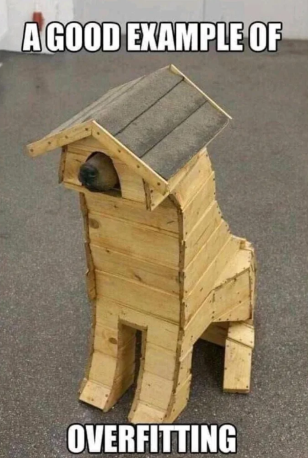

### SVD: Fewer features, better features

Singular Value Decomposition (SVD) helps control overfitting by acting as a powerful regularization and dimensionality reduction technique. It separates the important, underlying patterns (signal) in your data from the less important, random fluctuations (noise).

By using Truncated SVD, you can create a lower-rank approximation of your data. This involves two key steps:

1. Decomposition: You decompose your original data matrix, A, into its singular values and vectors.

2. Truncation: You keep only the top 'k' singular values and their corresponding vectors, discarding the rest. These 'k' components represent the strongest signals.

The result is a simplified, "denoised" version of your data that occupies a lower-dimensional space.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd

class TruncEssayScorer:

  def __init__(self, dim):
    self.tfidf = TfidfVectorizer()
    self.svd = TruncatedSVD(n_components=dim)
    self.classifier = LogisticRegression(class_weight="balanced")

  def train(self, X, y):
    X_tfidf = self.tfidf.fit_transform(X)
    X_svd = self.svd.fit_transform(X_tfidf)
    self.classifier.fit(X_svd, y)

  def score(self, X):
    X_tfidf = self.tfidf.transform(X)
    X_svd = self.svd.transform(X_tfidf)
    return self.classifier.predict(X_svd)

In [ ]:
dim = 300
Pete = TruncEssayScorer(dim)
Pete.train(train['essay'], train['rater1_domain1'])
pred = Pete.score(test['essay'])
print(dim, aes_metrics(test['rater1_domain1'],pred))

300 {'QWK': np.float64(0.5680829956819963), 'Acc': 0.24522292993630573, 'SMD': np.float64(-0.15913256870119355)}


**Important**: Notice that we essentially removed features to obtain a higher accuracy! This demonstrates that fitting on the original features was indeed an example of overfitting.

## Hand-crafted Features <a name="features"></a>

What if the words aren't sufficient. We need a measure of quality. Some simple text statistics could reveal a little more about the essay. For example, the average letters per word may indicate that the student is using sophisticated vocabulary. The number of words per sentence may give us sentence complexity. Readability measures give an indication of relative grade level and so on. So let us import a libarary that provides us with some of these statistics:

In [ ]:
!pip install textstat
import textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [ ]:
dir(textstat)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'attribute',
 'automated_readability_index',
 'avg_character_per_word',
 'avg_letter_per_word',
 'avg_sentence_length',
 'avg_sentence_per_word',
 'avg_syllables_per_word',
 'backend',
 'char_count',
 'coleman_liau_index',
 'count_arabic_long_words',
 'count_arabic_syllables',
 'count_complex_arabic_words',
 'count_faseeh',
 'crawford',
 'dale_chall_readability_score',
 'dale_chall_readability_score_v2',
 'difficult_words',
 'difficult_words_list',
 'fernandez_huerta',
 'flesch_kincaid_grade',
 'flesch_reading_ease',
 'gulpease_index',
 'gunning_fog',
 'gutierrez_polini',
 'is_difficult_word',
 'is_easy_word',
 'letter_count',
 'lexicon_count',
 'linsear_write_formula',
 'lix',
 'long_word_count',
 'mcalpine_eflaw',
 'miniword_count',
 'monosyllabcount',
 'osman',
 'polysyllabcount',
 'reading_time',
 'remove_punctuation',
 'rix',
 

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def get_features(texts):
  features = [[textstat.letter_count(x),
               textstat.sentence_count(x),
               textstat.avg_letter_per_word(x),
               textstat.avg_sentence_per_word(x),
               textstat.flesch_reading_ease(x),
               textstat.automated_readability_index(x),
               textstat.dale_chall_readability_score(x),
               textstat.avg_syllables_per_word(x),
               textstat.reading_time(x)] for x in texts]
  return np.array(features)

X_train = get_features(train['essay'])
X_test = get_features(test['essay'])
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(X_train, train['rater1_domain1'])
pred = clf.predict(X_test)
print(aes_metrics(test['rater1_domain1'],pred))

{'QWK': np.float64(0.6086580663458203), 'Acc': 0.3057324840764331, 'SMD': np.float64(-0.14691497145400212)}


## Combining the Features for a Classifier
The power of this method comes from combining both feature sets into a single, comprehensive vector for each document. The process is a straightforward concatenation. 🧩

**Generate Vectors:** For a single document, first, generate its TF-IDF vector (e.g., a vector of 10 dimensions).

**Calculate Features:** Next, calculate its hand-crafted features (e.g., a vector of 10 dimensions).

**Concatenate:** Append the hand-crafted feature vector to the end of the TF-IDF vector. This creates a new, combined feature vector (in this example, 10,005 dimensions).

**Train the Model:** This final, combined vector is then used as the input to train any standard classification algorithm, such as a Support Vector Machine (SVM), Logistic Regression, or Random Forest.

By combining these two types of features, the model gets a more holistic view of the data. It learns from both the nuanced word choices captured by TF-IDF and the explicit structural properties captured by the hand-crafted features, often leading to a significant boost in classification performance. 📈

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd

class BoWScorer:

  def __init__(self, dim):
    self.tfidf = TfidfVectorizer()
    self.svd = TruncatedSVD(n_components=dim)
    self.classifier = RandomForestClassifier(class_weight="balanced")

  def train(self, X, y):
    X_tfidf = self.tfidf.fit_transform(X)
    X_svd = self.svd.fit_transform(X_tfidf)
    X_features = get_features(X)
    X_combined = np.concatenate((X_svd, X_features), axis=1)
    self.classifier.fit(X_combined, y)

  def score(self, X):
    X_tfidf = self.tfidf.transform(X)
    X_svd = self.svd.transform(X_tfidf)
    X_features = get_features(X)
    X_combined = np.concatenate((X_svd, X_features), axis=1)
    return self.classifier.predict(X_combined)

dim = 10
Pete = BoWScorer(dim)
Pete.train(train['essay'], train['rater1_domain1'])
pred = Pete.score(test['essay'])
print(dim, aes_metrics(test['rater1_domain1'],pred))

10 {'QWK': np.float64(0.6776741192311676), 'Acc': 0.3821656050955414, 'SMD': np.float64(-0.16812655240837246)}


### Turning on a GPU <a name="turn_on_gpu"></a>
### Instructions

1.  Click on the **Runtime** tab in the top menu bar.
2.  From the dropdown menu, select **Change runtime type**.
3.  In the pop-up window, click the dropdown menu for **Hardware accelerator**.
4.  Select **GPU** from the list.
5.  Click **Save**.

-----

### Verification

To confirm the GPU is active, you can run the following code cell in your notebook. It uses the `nvidia-smi` command to display information about the connected NVIDIA GPU.

```python
!nvidia-smi
```

If the command executes and shows a table with GPU details (like driver version, CUDA version, and GPU name, e.g., Tesla T4), you have successfully enabled the GPU. If it returns an error, something went wrong, and you should try the steps again.

In [ ]:
!nvidia-smi

As this is a new session, you may want to reload the data.

In [ ]:
import datasets
import sklearn
import pandas as pd
import numpy as np

data_id = "llm-aes/asap-7-original"
data = datasets.load_dataset(data_id)
df = pd.DataFrame(data["train"])
train, test = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
def aes_metrics(y1, y2):
  qwk = sklearn.metrics.cohen_kappa_score(y1, y2, weights="quadratic")
  acc = sklearn.metrics.accuracy_score(y1, y2)
  smd_numerator = np.mean(y1) - np.mean(y2)
  smd_denominator = np.sqrt((np.std(y1)**2 + np.std(y2)**2)/2)
  smd = smd_numerator / smd_denominator
  return {"QWK": qwk, "Acc": acc, "SMD":smd}

## Pretrained Embeddings <a name="embeddings"></a>

Creating a document embedding involves condensing the meaning of all the words in a document into one fixed-size numerical vector. There are a few common ways to do this:

- Pooling Word Embeddings: A simple approach is to take the pretrained word embeddings (like GloVe or Word2Vec) for every word in the document and then combine them, for instance, by averaging them. This creates a single vector that represents a "mean" of the document's meaning.

- Specialized Models: More advanced models are trained specifically to create document vectors. These models learn not just word meanings but also how word order and grammar contribute to the overall meaning of a sentence or paragraph.

- Transformer-Based Models: Modern models like BERT are excellent at this. They can generate a single vector (often from a special [CLS] token) that represents the entire input text, taking the full context of the sequence into account.

A popular library for embeddings is the sentence transformer library.

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
import torch

class EmbeddingEssayScorer:

  def __init__(self, model_id):
    self.emb = SentenceTransformer(model_id)
    self.classifier = LogisticRegression(class_weight="balanced")

  def train(self, X, y):
    self.X_train = self.emb.encode(list(X))
    self.classifier.fit(self.X_train, list(y))

  def score(self, X):
    self.X_test = self.emb.encode(list(X))
    return self.classifier.predict(self.X_test)

In [ ]:
model_id = "all-MiniLM-L6-v2"
Pete = EmbeddingEssayScorer(model_id)
Pete.train(list(train['essay']), list(train['rater1_domain1']))
pred = Pete.score(test['essay'])
print(aes_metrics(test['rater1_domain1'],pred))

{'QWK': np.float64(0.5647803912501483), 'Acc': 0.2070063694267516, 'SMD': np.float64(0.02212369076606493)}


In [ ]:
from sentence_transformers import SentenceTransformer
import torch

class EmbeddingLinearEssayScorer(torch.nn.Module):

  def __init__(self, model_id,min_score, max_score):
    self.emb = SentenceTransformer(model_id)
    self.classifier = torch.nn.Linear(self.emb.get_sentence_embedding_dimension(), max_score-min_score+1)

  def train(self, X, y, epochs=10):
    optimizer = torch.optim.AdamW(self.classifier.parameters(), lr=5e-5)
    for X_batch, y_batch in zip(X,y):
      optimizer.zero_grad()
      X_batch = self.emb.encode(X_batch)
      y_batch = y_batch
      loss = self.classifier(X_batch, y_batch)
      loss.backward()
      optimizer.step()

  def score(self, X):
    self.X_test = self.emb.encode(list(X))
    return self.classifier.predict(self.X_test)

In [ ]:
model_id = "all-MiniLM-L6-v2"
Pete = EmbeddingLinearEssayScorer(model_id)
Pete.train(list(train['essay']), list(train['rater1_domain1']))
pred = Pete.score(test['essay'])
print(dim, aes_metrics(test['rater1_domain1'],pred))

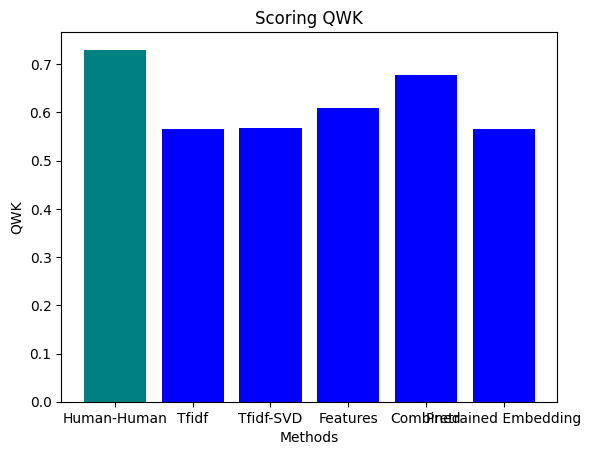

In [ ]:
import matplotlib.pyplot as plt

# 1. Define your data
#    Categories for the x-axis
categories = ['Human-Human', 'Tfidf', 'Tfidf-SVD', 'Features',"Combined","Pretrained Embedding"]
# Corresponding values for the y-axis
values = [0.7299561819547309,0.5665739821251241 , 0.5680829956819963, 0.6086580663458203, 0.6776741192311676, 0.5647803912501483]

# 2. Create the bar graph
plt.bar(categories, values, color=['teal','blue','blue','blue','blue','blue'])

# 3. Add labels and a title
plt.title('Scoring QWK')
plt.xlabel('Methods')
plt.ylabel('QWK')

# 4. Display the plot
plt.show()

## Fine-Tuning Language Models for Classification <a name="llms"></a>

This is where the model is specialized for a task like sentiment analysis, topic categorization, or spam detection. The process involves a few key steps:

**Add a Classification Head:** The pre-trained model is an expert at understanding text but doesn't know how to output a simple category label. To fix this, a small, new neural network layer, called a "classification head," is attached to the end of the pre-trained model. The job of this head is to take the rich, contextual understanding from the base model and map it to the desired output classes (e.g., "Positive," "Negative," "Neutral").

**Prepare Labeled Data:** You need a custom dataset that's specific to your task. This dataset consists of examples paired with the correct labels (e.g., an email labeled as "Spam" or a news headline labeled as "Sports"). This dataset is typically thousands of times smaller than the data used for pre-training.

**Train the Model:** The labeled data is fed through the combined model (base + head). The model makes a prediction, which is compared against the true label to calculate an error. This error is then used to make small adjustments to the parameters of both the new classification head and, crucially, the original pre-trained model. This step doesn't change the model drastically; it just "nudges" its vast existing knowledge to become more focused and accurate for your specific task.

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from tqdm.notebook import tqdm, trange

class FineTunedEssayScorer:

  def __init__(self, model_id, max_score, min_score):
    self.max_score = max_score
    self.min_score = min_score
    self.classifier = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels = max_score - min_score + 1)
    self.tokenizer = AutoTokenizer.from_pretrained(model_id)
    if torch.cuda.is_available():
      self.classifier.cuda()

  def train(self, X, y, epochs = 10):
    self.classifier.train()
    optimizer = torch.optim.AdamW(self.classifier.parameters(), lr=5e-5)
    N = len(X)
    for e in range(epochs):
      for i in tqdm(range(N)):
        optimizer.zero_grad()
        X_batch = self.tokenizer(X[i],
                                 return_tensors='pt',
                                 padding="max_length",
                                 truncation=True,
                                 max_length=512).to(self.classifier.device)
        y_batch = y[i] - self.min_score
        outputs = self.classifier(**X_batch, labels=torch.tensor([y_batch]).to(self.classifier.device))
        loss = outputs.loss
        loss.backward()
        optimizer.step()

  def score(self, X):
    self.classifier.eval()
    scores = []
    with torch.no_grad():
      for X_batch in tqdm(X):
        X_batch = self.tokenizer(X_batch,
                                 return_tensors='pt',
                                 padding="max_length",
                                 truncation=True,
                                 max_length=512).to(self.classifier.device)
        outputs = self.classifier(**X_batch)
        scores.append(int(outputs.logits.cpu().argmax(dim=1)) + self.min_score)
    return scores

In [ ]:
Pete = FineTunedEssayScorer("google/electra-small-discriminator", max_score = max(train['rater1_domain1']), min_score = min(train['rater1_domain1']))
Pete.train(list(train['essay']), list(train['rater1_domain1']), epochs=4)
pred = Pete.score(test['essay'])
print(aes_metrics(test['rater1_domain1'],pred))

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

  0%|          | 0/1255 [00:00<?, ?it/s]

  0%|          | 0/1255 [00:00<?, ?it/s]

  0%|          | 0/1255 [00:00<?, ?it/s]

In [ ]:
print(aes_metrics(test['rater1_domain1'],[int(x) for x in pred]))

The above constitutes how we actually trained the model back in 2019 when we first trained BERT for scoring in our publication "Language models and Automated Essay Scoring". We had no other way.  

The Hugging Face Trainer class is a high-level API that significantly simplifies the process of training Transformer models. While a manual loop offers maximum flexibility, the Trainer provides numerous advantages for most common use cases:

Reduced Boilerplate: It abstracts away the repetitive and often complex code required for a standard training loop. You don't need to manually write loops for epochs and batches, handle device placement (.to(device)), manage optimizer steps, or calculate gradients.

- Integrated Features: The Trainer comes with many powerful, built-in features that you would otherwise have to implement yourself:

- Distributed Training: Easily scales your training across multiple GPUs or TPUs with minimal code changes.

- Mixed-Precision Training: Enables faster training and reduced memory usage with a simple flag (fp16=True).

- Checkpoint Management: Automatically saves and manages model checkpoints during training, making it easy to resume or use the best-performing model.

- Logging & Progress Bars: Provides clean and informative progress bars and integrates seamlessly with logging libraries like TensorBoard and Weights & Biases.

- Evaluation: Includes a built-in evaluation loop that runs validation and computes metrics at specified intervals.

- Gradient Accumulation: Allows for training with larger effective batch sizes than what can fit into memory.

- Simplicity and Readability: The training configuration is neatly organized in the TrainingArguments class, making your code cleaner, easier to read, and less prone to bugs compared to a long, manual training script.

- Optimization: The Trainer is highly optimized and maintained to work efficiently with the entire Hugging Face ecosystem, including the datasets and evaluate libraries

In [ ]:
from transformers import (AutoModelForSequenceClassification,
                          AutoTokenizer,
                          Trainer,
                          TrainingArguments,
                          ProgressCallback)
from torch.utils.data import Dataset
import torch
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.metrics import cohen_kappa_score, accuracy_score

def SMD(y_true, y_pred):
  num = np.mean(y_true) - np.mean(y_pred)
  den = np.sqrt(np.var(y_true) / len(y_true) + np.var(y_pred) / len(y_pred))
  return num / den

tokenizer = AutoTokenizer.from_pretrained("google/electra-small-discriminator")

train_encodings = tokenizer(list(train['essay']), truncation=True, padding=True)
test_encodings = tokenizer(list(test['essay']), truncation=True, padding=True)

class EssayDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

train_dataset = EssayDataset(train_encodings, list(train['rater1_domain1']))
test_dataset = EssayDataset(test_encodings, list(test['rater1_domain1']))

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"QWK":cohen_kappa_score(labels, predictions,weights="quadratic"),
            "SMD":SMD(labels, predictions),
            "ACC":accuracy_score(labels, predictions)}

class TrainerEssayScorer:

  def __init__(self, model_id, max_score, min_score):
    self.max_score = max_score
    self.min_score = min_score
    self.classifier = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels = max_score - min_score + 1)
    self.tokenizer = AutoTokenizer.from_pretrained(model_id)

  def train(self, X, y, epochs = 10):
    args = TrainingArguments(
        output_dir="output",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=epochs,
        weight_decay=0.01,
    )
    trainer = Trainer(
        model=self.classifier,
        args=args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
        callbacks=[ProgressCallback()]
    )
    trainer.train()

  def score(self, X_batch):
    self.classifier.eval()
    with torch.no_grad():
      X_batch = self.tokenizer(X_batch, return_tensors='pt', padding=True, truncation=True)
      outputs = self.classifier(**X_batch)
    return outputs.logits.argmax(dim=1) + self.min_score

In [ ]:
Pete = FineTunedEssayScorer("google/electra-small-discriminator", max_score = max(train['rater1_domain1']), min_score = min(train['rater1_domain1']))
Pete.train(list(train['essay']), list(train['rater1_domain1']), epochs=4)
pred = Pete.score(test['essay'])
print(aes_metrics(test['rater1_domain1'],pred))

In [ ]:
from transformers import (AutoModelForSequenceClassification,
                          AutoTokenizer,
                          Trainer,
                          TrainingArguments,
                          ProgressCallback)
from torch.utils.data import Dataset
import torch
from tqdm.notebook import tqdm, trange
import numpy as np
from sklearn.metrics import cohen_kappa_score, accuracy_score

def SMD(y_true, y_pred):
  num = np.mean(y_true) - np.mean(y_pred)
  den = np.sqrt(np.var(y_true) / len(y_true) + np.var(y_pred) / len(y_pred))
  return num / den

tokenizer = AutoTokenizer.from_pretrained("google/electra-small-discriminator")

train_encodings = tokenizer(list(train['essay']), truncation=True, padding="max_length", max_length=512)
test_encodings = tokenizer(list(test['essay']), truncation=True, padding="max_length", max_length=512)

class EssayDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

train_dataset = EssayDataset(train_encodings, list(train['rater1_domain1']))
test_dataset = EssayDataset(test_encodings, list(test['rater1_domain1']))

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"QWK":cohen_kappa_score(labels, predictions,weights="quadratic"),
            "SMD":SMD(labels, predictions),
            "ACC":accuracy_score(labels, predictions)}

class TrainerEssayScorer:

  def __init__(self, model_id, max_score, min_score):
    self.max_score = max_score
    self.min_score = min_score
    self.classifier = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels = max_score - min_score + 1)
    self.tokenizer = AutoTokenizer.from_pretrained(model_id)

  def train(self, X, y, epochs = 10):
    args = TrainingArguments(
        output_dir="output",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=5e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=epochs,
        report_to="none"
    )
    trainer = Trainer(
        model=self.classifier,
        args=args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
        callbacks=[ProgressCallback()]
    )
    trainer.train()

  def score(self, X_batch):
    self.classifier.eval()
    with torch.no_grad():
      X_batch = self.tokenizer(X_batch, return_tensors='pt', padding="max_length", truncation=True, max_length=512)
      outputs = self.classifier(**X_batch)
    return outputs.logits.argmax(dim=1) + self.min_score

In [ ]:
Pete = TrainerEssayScorer("google/electra-small-discriminator", max_score = max(train['rater1_domain1']), min_score = min(train['rater1_domain1']))
Pete.train(list(train['essay']), list(train['rater1_domain1']), epochs=1)
pred = Pete.score(test['essay'])
print(aes_metrics(test['rater1_domain1'],pred))

In [ ]:
list(zip(test['rater1_domain1'],pred))

# Advanced Techniques <a name="advanced_techniques"></a>

These are some of the techniques that distinguish a standard application from a state-of-the-art solution. These include hyper-parameter tuning,

## Hyperparameter Tuning <a name="hyperparameter"></a>

*   List item
*   List item



### Grid Search: The Brute-Force Method
Grid Search is the most straightforward method for hyperparameter tuning. You define a specific list of values for each hyperparameter you want to tune, and the algorithm exhaustively trains and evaluates a model for every possible combination of these values.


Imagine you're tuning two hyperparameters:

Learning Rate: [0.1, 0.01, 0.001]

Batch Size: [32, 64]

Grid Search will create a "grid" of all combinations and test each one:

Learning Rate = 0.1, Batch Size = 32

Learning Rate = 0.1, Batch Size = 64

Learning Rate = 0.01, Batch Size = 32

Learning Rate = 0.01, Batch Size = 64

Learning Rate = 0.001, Batch Size = 32

Learning Rate = 0.001, Batch Size = 64

Pros:

- Simple: Easy to understand and implement.

- Exhaustive: It's guaranteed to find the best combination within the specific grid you've defined.

Cons:

- Inefficient: It's computationally very expensive and suffers from the curse of dimensionality. If you have many hyperparameters or many values to test, the number of combinations explodes, making it impractical.

- Blind: It doesn't learn from past evaluations. A run with terrible performance provides no information to guide the search away from that region of the hyperparameter space.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import cohen_kappa_score
import numpy as np
import pandas as pd

class TruncEssayScorer:

  def __init__(self, dim):
    self.tfidf = TfidfVectorizer()
    self.svd = TruncatedSVD(n_components=dim)
    self.classifier = LogisticRegression(class_weight="balanced")

  def train(self, X, y):
    X_tfidf = self.tfidf.fit_transform(X)
    X_svd = self.svd.fit_transform(X_tfidf)
    self.classifier.fit(X_svd, y)

  def score(self, X):
    X_tfidf = self.tfidf.transform(X)
    X_svd = self.svd.transform(X_tfidf)
    return self.classifier.predict(X_svd)

pretrain, test = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=42)
train, dev = sklearn.model_selection.train_test_split(pretrain, test_size=0.2, random_state=42)

print("--- Starting Grid Search for 'dim' ---")
dim_values = [10,20,30,100,150,200,300] # The dimensions to test for SVD
results = {}

for dim in dim_values:
    print(f"Training model with dim = {dim}...")

    # Initialize and train the model
    scorer = TruncEssayScorer(dim=dim)
    scorer.train(train['essay'], train['domain1_score'])

    # Make predictions on the development set
    dev_predictions = scorer.score(dev['essay'])

    # Calculate the Quadratic Weighted Kappa (QWK)
    qwk = cohen_kappa_score(dev['domain1_score'], dev_predictions, weights='quadratic')

    # Store the result
    results[dim] = qwk
    print(f"  -> QWK on dev set: {qwk:.4f}\n")

best_dim = max(results, key=results.get)
best_qwk = results[best_dim]

print(f"Best 'dim' found: {best_dim}")
print(f"Corresponding QWK on dev set: {best_qwk:.4f}")

test_predictions = scorer.score(test['essay'])
test_qwk = cohen_kappa_score(test['domain1_score'], test_predictions, weights='quadratic')
print(f"QWK on test set: {test_qwk:.4f}")

### Bayesian Optimization: The Smart Search Method 🧠
Bayesian Optimization is a more intelligent and efficient approach. Instead of blindly trying all combinations, it uses the results from previous trials to make an informed decision about which set of hyperparameters to try next. It builds a probabilistic model of the objective function (e.g., model accuracy) and uses this model to select the most promising hyperparameters.

The process works in a loop:

Pick a set of hyperparameters and train the model.

Record the performance (e.g., validation accuracy).

Update a probabilistic "surrogate model" that maps hyperparameters to performance. This model represents the algorithm's "belief" about how good any given set of hyperparameters might be.

Use an acquisition function to decide the next set of hyperparameters to test. This function balances exploitation (choosing hyperparameters that the surrogate model predicts will perform well) and exploration (choosing hyperparameters in an uncertain region to gather more information).

Repeat until a stopping criterion (like a set number of iterations) is met.

Tree-structured Parzen Estimator (TPE)
TPE is a popular Bayesian optimization algorithm. Unlike traditional methods that model P(score | hyperparameters), TPE cleverly models P(hyperparameters | score).

Here’s the core idea:

It gathers a history of hyperparameter-score pairs.

It divides those observations into two groups: a "good" group (e.g., the top 25% of scores) and a "bad" group (the rest).

It creates two probability distributions: one for the hyperparameters in the "good" group and one for those in the "bad" group.

To choose the next hyperparameters to test, it looks for values that are highly likely in the "good" distribution but unlikely in the "bad" one. This effectively asks, "Which hyperparameters look more like the ones that have performed well in the past?"

Pros:

- Efficient: It finds better hyperparameters in far fewer iterations than Grid Search or Random Search.

- Intelligent: It learns from its mistakes and progressively focuses on more promising regions of the search space.

Cons:

- Complex: More difficult to understand and implement from scratch.

- Sequential: It is harder to parallelize because the choice for the next trial depends on the results of the previous ones.

In [ ]:
!pip install optuna

import optuna

def objective(trial):
    dim = trial.suggest_int('dim', 10, 300)
    scorer = TruncEssayScorer(dim=dim)
    scorer.train(train['essay'], train['domain1_score'])

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

best_dim = study.best_params['dim']

## Regression-Based Scoring <a name="regression"></a>

When you have a large number of targets, and few training examples to work from per target, sometimes it is worth working with regression based scoring instead of cross-entropy. The first goal is to map the scores from min_score to max_score to the interval $I = [0,1]$. The best way to do this is by dividing the interval $I$ into equal pieces, then mapping each score point to the midpoint of those intervals. Some simple algebra tells us that this linear function is

$$
\mu(n) = \frac{n - \min+\frac{1}{2}}{\max-\min+1}
$$

The inverse of this mapping, which sends the each interval back to the range $\{\min, ..., \max\}$ is given by

$$
\mu^{-1}(x) = [y(\max - \min+1) + \min - 0.5]
$$

In [ ]:
import datasets
import pandas as pd
import sklearn

data_id = "llm-aes/asap-7-original"
data = datasets.load_dataset(data_id)
df = pd.DataFrame(data["train"])
train, test = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=42)

README.md:   0%|          | 0.00/932 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/842k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1569 [00:00<?, ? examples/s]

In [ ]:
from transformers import (AutoModelForSequenceClassification,
                          AutoTokenizer,
                          Trainer,
                          TrainingArguments,
                          ProgressCallback,
                          TrainerCallback)
from torch.utils.data import Dataset
import torch
from tqdm.notebook import tqdm, trange
import numpy as np

def mu(n, min_score, max_score):
  return (n - min_score + 0.5) / (max_score - min_score + 1)

def mu_inv(x, min_score, max_score):
  return x * (max_score - min_score + 1) + min_score - 0.5

tokenizer = AutoTokenizer.from_pretrained("google/electra-small-discriminator")
train_encodings = tokenizer(list(train['essay']), truncation=True, padding="max_length", max_length=512)
test_encodings = tokenizer(list(test['essay']), truncation=True, padding="max_length", max_length=512)
model = AutoModelForSequenceClassification.from_pretrained("google/electra-small-discriminator", num_labels = 1)

class EssayDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor([mu(self.labels[idx], min(train['rater1_domain1']), max(train['rater1_domain1']))])
    return item

train_dataset = EssayDataset(train_encodings, list(train['rater1_domain1']))
test_dataset = EssayDataset(test_encodings, list(test['rater1_domain1']))

class MyTrainer(Trainer):

  def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=1):
    labels = inputs.pop("labels")
    outputs = model(**inputs)
    logits = outputs.logits
    loss = torch.nn.functional.mse_loss(logits, labels)
    return (loss, outputs) if return_outputs else loss

class MyCallback(TrainerCallback):
  def on_epoch_end(self, args, state, control, **kwargs):
    import pdb
    pdb.set_trace()

args = TrainingArguments(
    output_dir="output",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    report_to="none")
trainer = MyTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[ProgressCallback()]
)

trainer.control.trainer = trainer
trainer.control.dev = test_dataset

trainer.train()

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/471 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
1,No log,0.017086
2,No log,0.016778
3,No log,0.018462


  0%|          | 0/40 [00:00<?, ?it/s]

{'eval_loss': 0.01708582229912281, 'eval_runtime': 96.0994, 'eval_samples_per_second': 3.267, 'eval_steps_per_second': 0.416, 'epoch': 1.0}


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


  0%|          | 0/40 [00:00<?, ?it/s]

{'eval_loss': 0.016777731478214264, 'eval_runtime': 88.533, 'eval_samples_per_second': 3.547, 'eval_steps_per_second': 0.452, 'epoch': 2.0}


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


  0%|          | 0/40 [00:00<?, ?it/s]

{'eval_loss': 0.018461570143699646, 'eval_runtime': 97.0162, 'eval_samples_per_second': 3.237, 'eval_steps_per_second': 0.412, 'epoch': 3.0}
{'train_runtime': 5025.3803, 'train_samples_per_second': 0.749, 'train_steps_per_second': 0.094, 'train_loss': 0.03154808093028463, 'epoch': 3.0}


TrainOutput(global_step=471, training_loss=0.03154808093028463, metrics={'train_runtime': 5025.3803, 'train_samples_per_second': 0.749, 'train_steps_per_second': 0.094, 'total_flos': 110761975249920.0, 'train_loss': 0.03154808093028463, 'epoch': 3.0})

## Calling Generative Models <a name="generative"></a>

There are two ways we will be calling generative models:

- API-based:

- Local Models:

Because this workshop is meant to be completely free, I will be using two free (limited) tools to use these models.

### API-based: Cerebras and Groq

Cerebras and Groq are two prominent companies in the AI hardware space, each with a radically different architectural philosophy aimed at solving distinct problems in artificial intelligence workloads. While both create specialized processors that challenge traditional GPUs, they are optimized for different tasks.

### Core Philosophy and Architecture

**Cerebras: "Go Big" with Wafer-Scale Integration**
Cerebras's core innovation is the **Wafer-Scale Engine (WSE)**, the largest chip ever built. Instead of dicing a silicon wafer into hundreds of individual chips, Cerebras uses the entire wafer as a single, massive processor.

* **Architecture:** The latest WSE-3 contains 4 trillion transistors and 900,000 AI-optimized compute cores on a single piece of silicon.
* **Problem Solved:** This design eliminates the primary bottleneck in large-scale AI: communication latency between individual chips. By keeping all compute cores and memory on one substrate with a high-speed interconnect fabric, data transfer is orders of magnitude faster than in a cluster of interconnected GPUs.
* **Analogy:** If a traditional GPU cluster is like a city with thousands of cars (data packets) stuck in traffic moving between buildings (chips), the Cerebras WSE is like having the entire city inside one massive, interconnected skyscraper.

**Groq: "Go Fast" with Deterministic Execution**
Groq’s innovation is the **Language Processing Unit (LPU)**, a chip designed from the ground up for speed and predictability, particularly for AI inference.

* **Architecture:** The LPU is a single-core, tensor-streaming processor. Its design is intentionally simple and relies on a software-first approach. The compiler schedules every instruction and data movement in advance.
* **Problem Solved:** This results in **deterministic execution**, meaning a computation takes the exact same amount of time every time it runs. It eliminates the unpredictability and overhead of traditional hardware (like caches and schedulers), leading to extremely low latency.
* **Analogy:** If a GPU is like a chaotic workshop with many workers grabbing tools as needed (dynamic scheduling), the Groq LPU is a perfectly synchronized assembly line where every movement is pre-planned for maximum speed and efficiency.

---

### Primary Use Case

This is the most significant point of differentiation between the two companies.

* **Cerebras: Excels at Training Massive AI Models.** The WSE's vast compute power and unparalleled memory bandwidth make it ideal for training foundational models with trillions of parameters from scratch. It dramatically reduces the time required for training runs that would otherwise take weeks or months on large GPU clusters. While capable of inference, its primary strength is in large-scale training and research.

* **Groq: Excels at Ultra-Low Latency Inference.** The LPU is purpose-built to run already-trained models and deliver responses as quickly as possible. This is critical for real-time applications like conversational AI, live translation, and other services where speed is paramount. Its architecture is specifically tuned to maximize tokens-per-second output for large language models (LLMs).

---

### At a Glance Comparison

| Feature | Cerebras | Groq |
| :--- | :--- | :--- |
| **Analogy** | A single, massive skyscraper | A perfectly synchronized assembly line |
| **Core Concept** | Scale-Up (massive single processor) | Speed-Up (streamlined, predictable execution) |
| **Primary Use Case**| **Training** large, foundational AI models | **Inference** for real-time applications |
| **Key Innovation** | Wafer-Scale Engine (WSE) | Language Processing Unit (LPU) |
| **Optimizes For** | Throughput, reduced training time | Ultra-low latency, predictable performance |
| **Hardware Hallmark** | The world's largest chip | Software-defined, deterministic single-core design|
| **Target Market** | National labs, large enterprises, AI researchers | Developers and businesses needing real-time AI |

In [ ]:
!pip install groq
from IPython.display import Math, display, Latex, Markdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import groq

groq_client = groq.Client(api_key = userdata.get('groq_key'))

def get_llm_response(user_prompt):
    chat_completion = groq_client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": user_prompt,
            }
        ],
        model="openai/gpt-oss-20b",
    )

    response_content = chat_completion.choices[0].message.content
    return response_content

In [ ]:
display(Markdown(get_llm_response("""A water tank is being filled by two pipes.

Pipe A can fill the tank in 4 hours, and Pipe B can fill it in 6 hours.

There is also a drain, Pipe C, that can empty the full tank in 3 hours.

If all three pipes are opened simultaneously when the tank is empty, how long will it take for the tank to be filled?

Please show your step-by-step reasoning.""").replace("\[","$$").replace("\]","$$")))

<>:9: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipython-input-2549106047.py:9: SyntaxWarning: invalid escape sequence '\['
  Please show your step-by-step reasoning.""").replace("\[","$$").replace("\]","$$")))
/tmp/ipython-input-2549106047.py:9: SyntaxWarning: invalid escape sequence '\]'
  Please show your step-by-step reasoning.""").replace("\[","$$").replace("\]","$$")))


**Step 1: Convert each pipe’s speed into “tank per hour”.**  
- Pipe A fills the whole tank in 4 h → rate \(R_A = \dfrac{1}{4}\) tank/hour.  
- Pipe B fills the whole tank in 6 h → rate \(R_B = \dfrac{1}{6}\) tank/hour.  
- Pipe C (the drain) empties the full tank in 3 h → rate \(R_C = \dfrac{1}{3}\) tank/hour (negative because it removes water).  

**Step 2: Add the rates to get the net rate.**  
$$
R_{\text{net}} = R_A + R_B - R_C 
= \frac{1}{4} + \frac{1}{6} - \frac{1}{3}.
$$

Find a common denominator (12):

$$
R_{\text{net}} = \frac{3}{12} + \frac{2}{12} - \frac{4}{12}
= \frac{3+2-4}{12}
= \frac{1}{12}\text{ tank/hour}.
$$

**Step 3: Determine the time required to fill one tank.**  
The net rate tells us how much of the tank is filled each hour.  
$$
\text{Time} = \frac{1\text{ tank}}{R_{\text{net}}}
= \frac{1}{\frac{1}{12}}
= 12\text{ hours}.
$$

---

**Answer:** It will take **12 hours** to fill the tank when all three pipes (A, B, and C) are opened at the same time.

In [ ]:
!pip install cerebras
from IPython.display import Math, display, Latex, Markdown

In [ ]:
from cerebras.cloud.sdk import Cerebras
from google.colab import userdata

cerebras_client = Cerebras(api_key=userdata.get("cerebras_key"))

def get_llm_response(user_prompt):
    chat_completion = cerebras_client.chat.completions.create(
  messages=[
  {"role": "user", "content": user_prompt,}
],
  model="llama-4-scout-17b-16e-instruct",
)
    return chat_completion.choices[0].message.content

display(Markdown(get_llm_response("""A water tank is being filled by two pipes.

Pipe A can fill the tank in 4 hours, and Pipe B can fill it in 6 hours.

There is also a drain, Pipe C, that can empty the full tank in 3 hours.

If all three pipes are opened simultaneously when the tank is empty, how long will it take for the tank to be filled?

Please show your step-by-step reasoning.""").replace("\[","$$").replace("\]","$$")))

<>:26: SyntaxWarning: invalid escape sequence '\['
<>:26: SyntaxWarning: invalid escape sequence '\]'
<>:26: SyntaxWarning: invalid escape sequence '\['
<>:26: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipython-input-1525357137.py:26: SyntaxWarning: invalid escape sequence '\['
  Please show your step-by-step reasoning.""").replace("\[","$$").replace("\]","$$")))
/tmp/ipython-input-1525357137.py:26: SyntaxWarning: invalid escape sequence '\]'
  Please show your step-by-step reasoning.""").replace("\[","$$").replace("\]","$$")))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.1 MB/s eta 0:00:00


## Step 1: Determine the rate of filling for each pipe and the drain.
The rate of filling for Pipe A is \( \frac{1}{4} \) of the tank per hour, since it can fill the tank in 4 hours. The rate of filling for Pipe B is \( \frac{1}{6} \) of the tank per hour, as it can fill the tank in 6 hours. The rate of emptying for Pipe C (the drain) is \( \frac{1}{3} \) of the tank per hour, since it can empty the tank in 3 hours.

## 2: Calculate the combined rate of filling when all pipes are open.
To find the combined rate of filling the tank when all three pipes are open, we add the rates of Pipe A and Pipe B, and then subtract the rate of Pipe C (since it's emptying the tank). The combined rate \( R \) is given by:
$$ R = \frac{1}{4} + \frac{1}{6} - \frac{1}{3} $$

## 3: Perform the calculation for the combined rate.
First, find a common denominator for \( \frac{1}{4} \), \( \frac{1}{6} \), and \( \frac{1}{3} \). The least common denominator is 12. Convert each fraction:
$$ \frac{1}{4} = \frac{3}{12} $$
$$ \frac{1}{6} = \frac{2}{12} $$
$$ \frac{1}{3} = \frac{4}{12} $$
Then, calculate the combined rate:
$$ R = \frac{3}{12} + \frac{2}{12} - \frac{4}{12} $$
$$ R = \frac{3 + 2 - 4}{12} $$
$$ R = \frac{1}{12} $$

## 4: Calculate the time it takes to fill the tank.
The combined rate \( R \) of \( \frac{1}{12} \) of the tank per hour means that \( \frac{1}{12} \) of the tank is filled every hour. To find the time \( T \) it takes to fill the tank, we use the formula:
$$ T = \frac{1}{R} $$
Substituting \( R = \frac{1}{12} \):
$$ T = \frac{1}{\frac{1}{12}} $$
$$ T = 12 $$

The final answer is: $\boxed{12}$

### Local Models

Running language models (LLMs) locally, rather than relying on cloud-based APIs, is fundamentally important for ensuring robust security and privacy. When you use an external service, you are sending your data to a third party, creating inherent risks that are eliminated with a local approach.

---
### Key Security Advantages 🔐

* **Complete Data Control**: The most significant benefit is that your data never leaves your machine or private network. When you send a prompt containing proprietary code, a sensitive legal document, or a confidential business strategy to a cloud API, that information is transmitted over the internet and processed on someone else's servers. A local model keeps all data within your trusted environment.

* **Reduced Attack Surface**: By processing data locally, you eliminate the risk of data interception during transit (a "man-in-the-middle" attack). You also remove the third-party's infrastructure as a potential point of failure or attack. The security of your data is entirely dependent on your own network's security, which you control.

* **Immunity to External Breaches**: If a cloud AI provider suffers a data breach, any data you have sent them could be compromised. With a local model, you are completely insulated from the security failures of external companies.

---
### Critical Privacy Guarantees 🤫


* **Absolute Confidentiality**: For professionals dealing with sensitive information—such as doctors with patient records (PHI), lawyers with client case files, or researchers with unpublished data—using a cloud-based LLM is often not an option. Running the model locally ensures that confidential data remains confidential, period.

* **Prevention of Data Misuse**: Many cloud AI providers have policies stating they may use customer data to train future models. While some services offer opt-outs, policies can be opaque or change over time. Running an LLM locally provides an ironclad guarantee that your proprietary information will not be used to train a competitor's model or for any other purpose you do not approve of.

* **Simplified Regulatory Compliance**: Industries governed by strict data privacy regulations like **GDPR** (General Data Protection Regulation) in Europe or **HIPAA** (Health Insurance Portability and Accountability Act) in the US face significant compliance hurdles when using third-party services. Keeping all data processing in-house makes it far easier to meet these stringent data residency and privacy requirements.

In short, while cloud-based LLMs offer convenience, running them locally is the superior, and often only, choice for applications where the security and privacy of the input data cannot be compromised.

In [ ]:
from transformers import pipeline

pipe = pipeline("text-generation", model="LiquidAI/LFM2-350M-Math")

Device set to use cpu


In [ ]:
question = """A water tank is being filled by two pipes.

Pipe A can fill the tank in 4 hours, and Pipe B can fill it in 6 hours.

There is also a drain, Pipe C, that can empty the full tank in 3 hours.

If all three pipes are opened simultaneously when the tank is empty, how long will it take for the tank to be filled?

Please show your step-by-step reasoning."""

chat = [{"role":"user","content":question}]
pipe_out = pipe(chat, max_new_tokens=2048)
from print(pipe_out[0]['generated_text'][1]['content'])

SyntaxError: invalid syntax (ipython-input-3851748088.py, line 13)

In [ ]:
from IPython.display import Math, display, Latex, Markdown

display(Markdown(pipe_out[0]['generated_text'][1]['content'].replace("\[","$$").replace("\]","$$")))

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:3: SyntaxWarning: invalid escape sequence '\]'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:3: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipython-input-2489915343.py:3: SyntaxWarning: invalid escape sequence '\['
  display(Markdown(pipe_out[0]['generated_text'][1]['content'].replace("\[","$$").replace("\]","$$")))
/tmp/ipython-input-2489915343.py:3: SyntaxWarning: invalid escape sequence '\]'
  display(Markdown(pipe_out[0]['generated_text'][1]['content'].replace("\[","$$").replace("\]","$$")))


Okay, let's see. I need to figure out how long it takes to fill the tank with pipes A, B, and C all open at the same time. Hmm. So, let me start by understanding each pipe's filling and draining times.

Pipe A can fill the tank in 4 hours. That means its rate is 1 tank per 4 hours, right? So in terms of work rate, Pipe A's rate is 1/4 per hour. Similarly, Pipe B can fill it in 6 hours, so its rate is 1/6 per hour. Pipe C empties the tank in 3 hours, so its rate is -1/3 per hour because it's draining. 

Now, when all three are open together, their rates should add up. So the combined rate would be the sum of their individual rates. Let me write that down:

Total rate = Pipe A + Pipe B + Pipe C = (1/4) + (1/6) + (-1/3). 

Wait, hold on, the draining is negative, so that's -1/3. Let me compute this step by step. First, let's find a common denominator for the fractions. The denominators are 4, 6, and 3. The least common denominator here is 12. So converting each fraction:

1/4 = 3/12

1/6 = 2/12

1/3 = 4/12

So adding them up with the negative one:

3/12 + 2/12 - 4/12 = (3 + 2 - 4)/12 = 1/12. 

Ah, so together they fill the tank at a rate of 1/12 per hour. That means every hour, the tank is effectively gaining 1/12 of its capacity. 

Since the tank is initially empty and we want to know the time taken to fill it up, we can use the formula:

Time = (Total Work) / (Rate)

Here, the "Total Work" is 1 tank (the whole tank). The rate is 1/12 per hour, so:

Time = 1 / (1/12) = 12 hours.

Wait, that seems straightforward, but let me double-check. If Pipe C is draining at 1/3 per hour, which is a significant drain compared to Pipe A and B. Pipe A and B together have a combined rate of 1/4 + 1/6 = 5/12 per hour. Then adding Pipe C's negative rate: 5/12 - 4/12 = 1/12. Yep, same result. So 1 divided by 1/12 is indeed 12. 

I think that's correct. All steps check out. No mistakes noticed here.
To determine how long it takes to fill the tank with pipes A, B, and C open simultaneously, calculate their combined rate:

- **Pipe A**: \( \frac{1}{4} \) tank/hour  
- **Pipe B**: \( \frac{1}{6} \) tank/hour  
- **Pipe C**: \( -\frac{1}{3} \) tank/hour (negative because it docks)  

**Combined Rate**:  
$$
\frac{1}{4} + \frac{1}{6} - \frac{1}{3} = \frac{3}{12} + \frac{2}{12} - \frac{4}{12} = \frac{1}{12} \, \text{tank/hour}
$$

**Time to Fill**:  
$$
\text{Time} = \frac{1 \, \text{tank}}{\frac{1}{12} \, \text{tank/hour}} = 12 \, \text{hours}
$$

**Answer**: \boxed{12}

## Scoring Using Generative Models <a name="generative_scoring"></a>

### The Challenge: Fine-Tuning Giant Models

Fully fine-tuning a large language model (LLM) like GPT-3 or Llama involves updating every single one of its billions of parameters for a new task. This process is incredibly expensive and inefficient.

* **High Computational Cost:** It requires a massive amount of GPU memory and processing power.
* **Large Storage Needs:** For each new task, you have to store a complete, multi-gigabyte copy of the fine-tuned model. This becomes impractical if you need to adapt the model for dozens of different tasks.


### The Solution: Parameter-Efficient Fine-Tuning (PEFT)

**Parameter-Efficient Fine-Tuning (PEFT)** methods solve this problem by freezing the vast majority of the pre-trained model's parameters and only training a very small number of new or existing parameters. This makes fine-tuning much more accessible and manageable.

**Low-Rank Adaptation (LoRA)** is one of the most popular and effective PEFT techniques.

### Enter LoRA: Low-Rank Adaptation

The core insight behind LoRA is that the change in the model's weights during fine-tuning (the "update matrix") can be effectively approximated using a much lower-rank representation.

#### How It Works

Instead of directly updating the original weight matrix $W$ of a layer, LoRA introduces two small, trainable "adapter" matrices, **A** and **B**.

1.  **Freeze Original Weights:** The pre-trained model weights ($W$) are kept frozen and are not updated during training.
2.  **Inject Adapters:** For a specific layer (like the attention layers in a Transformer), LoRA injects the two smaller matrices, $A$ and $B$, alongside the original weight matrix $W$. The product of these matrices, $BA$, creates a low-rank approximation of the weight update that full fine-tuning would have learned.
3.  **Train Only Adapters:** During training, only the parameters of matrices $A$ and $B$ are updated.

The mathematical representation for a layer's forward pass is modified from $h = Wx$ to:
$$h = Wx + \Delta Wx = Wx + BAx$$
Where:
* $W \in \mathbb{R}^{d \times k}$ is the frozen, pre-trained weight matrix.
* $B \in \mathbb{R}^{d \times r}$ and $A \in \mathbb{R}^{r \times k}$ are the small, trainable LoRA matrices.
* The **rank**, $r$, is a hyperparameter that is typically very small (e.g., 4, 8, 16), so $r \ll \min(d, k)$.



This decomposition is highly efficient. For a large matrix $W$, instead of training all $d \times k$ parameters, you only train the $r \times d + r \times k$ parameters in $A$ and $B$. This often represents less than 0.1% of the total model parameters.

#### Inference

A major advantage of LoRA is that it introduces **zero additional inference latency**. Once training is complete, the learned adapter weights can be merged directly into the original weights:
$$W_{new} = W + BA$$
You can then deploy this merged model just like the original, with no extra calculations needed during inference.

***

### Key Advantages of LoRA

* **Drastically Reduced Trainable Parameters:** Reduces the number of trainable parameters by up to 10,000 times, significantly lowering memory and computational requirements.
* **No Inference Latency:** The adapter weights merge with the base model, so it's just as fast as the original model for inference.
* **Efficient Task Switching:** Instead of storing a full model copy for each task, you only need to save the tiny LoRA adapter weights. To switch tasks, you can simply load the base model and apply the desired adapter.

### Coded Example

We start by applying the Adapter to the model:

In [ ]:
from transformers import (AutoModelForCausalLM,
                          AutoTokenizer,
                          Trainer,
                          TrainingArguments)
from peft import (LoraConfig,
                  get_peft_model)

model = AutoModelForCausalLM.from_pretrained("LiquidAI/LFM2-350M")
tokenizer = AutoTokenizer.from_pretrained("LiquidAI/LFM2-350M")

config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj", "k_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM)

model = get_peft_model(model, config)

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/709M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

In [ ]:
def chat_template(essay, score, min_score, max_score):
  chat = [{"role":"system","content":"You are an essay grader."},
          {"role":"user","content":f"""Provide a score between {min_score} and {max_score}. Your answer should be of the form

**Score**: [score]

**Essay**:
{essay}"""},
          {"role":"assistant","content":f"**Score**: {score}"}]
  return chat

In [ ]:
def score(essay, min_score, max_score):
  chat = tokenizer.apply_chat_template(chat_template(essay,"[[SCORE]]", min_score, max_score), tokenize=False)
  text = chat[:chat.index("[[SCORE]]")]
  model_input = tokenizer.encode(text, return_tensors="pt")
  generated_ids = model.generate(model_input, max_new_tokens=1)
  return int(tokenizer.decode(generated_ids[0])[-1])

7

In [ ]:
import datasets
import pandas as pd
import sklearn

data_id = "llm-aes/asap-7-original"
data = datasets.load_dataset(data_id)
df = pd.DataFrame(data["train"])
train, test = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from tqdm import tqdm

preds = [score(x, min(train['rater1_domain1']), max(train['rater1_domain1'])) for x in tqdm(test['essay'])]

100%|██████████| 314/314 [17:44<00:00,  3.39s/it]


In [ ]:
texts = []

,essay
1412,My at saying your patient is. Your patient whe...
985,Once upon a time there was a young girl named ...
432,Patience is hard. You always @CAPS1 it now not...
964,"Patience, @CAPS6 essential part of our world. ..."
1169,One time I was pacient was when my mum said th...
...,...
236,"That warm tear running down my cheek, the hot ..."
1384,I cant really tell you about a time when Ive...
1311,Being patience is what you need to get anythin...
1511,As we walked in the smell of mouth wash filed ...


In [ ]:
!pip install trl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.6/564.6 kB 12.2 MB/s eta 0:00:00


In [ ]:
from trl import (SFTTrainer,
                 SFTConfig)

train_texts = [{'text':tokenizer.apply_chat_template(chat_template(essay,score, min(train['rater1_domain1']), max(train['rater1_domain1'])), tokenize=False)} for essay, score in zip(test['essay'], test['rater1_domain1'])]

train_dataset = datasets.Dataset.from_list(train_texts)

args = SFTConfig(
    output_dir="output",
    save_strategy="no",
    learning_rate=2e-5,
    fp16=False,
    bf16=False,
    report_to="none",
    per_device_train_batch_size=1)
trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,

    )

trainer.train()

Adding EOS to train dataset:   0%|          | 0/314 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/314 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/314 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
10,3.222900
20,2.610000
30,2.284300
40,2.700200
50,2.323200
60,2.393100
70,2.167700
80,2.384900
90,2.109300
100,2.555200


KeyboardInterrupt: 